In [ ]:

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
#from tensorflow.keras.optimizers import Adamax
import sys
from PIL import Image
sys.modules['Image'] = Image
from tensorflow.keras.callbacks import ModelCheckpoint
"""
print(len(os.listdir('/content/gdrive/My Drive/reflective_refractive/train/reflective')))
print(len(os.listdir('/content/gdrive/My Drive/reflective_refractive/train/refractive')))
print(len(os.listdir('/content/gdrive/My Drive/reflective_refractive/validation/reflective')))
print(len(os.listdir('/content/gdrive/My Drive/reflective_refractive/validation/refractive')))
"""


"\nprint(len(os.listdir('/content/gdrive/My Drive/reflective_refractive/train/reflective')))\nprint(len(os.listdir('/content/gdrive/My Drive/reflective_refractive/train/refractive')))\nprint(len(os.listdir('/content/gdrive/My Drive/reflective_refractive/validation/reflective')))\nprint(len(os.listdir('/content/gdrive/My Drive/reflective_refractive/validation/refractive')))\n"

********************************************
**Generating the neccesary directory variables.**
********************************************

In [ ]:
train_dir = 'reflective_refractive/train'
validation_dir ='reflective_refractive/validation'
train_reflective_dir = 'reflective_refractive/train/reflective'
validation_reflective_dir = 'reflective_refractive/validation/reflective'
train_refractive_dir = 'reflective_refractive/train/refractive'
validation_refractive_dir = 'reflective_refractive/validation/refractive'

train_reflective_files = os.listdir(train_reflective_dir)
train_refractive_files = os.listdir(train_refractive_dir)


*******************************************
**Normalizing the images and converting them into (150x150) pixel size.**
*******************************************



In [ ]:
train_datagen = ImageDataGenerator( rescale = 1.0/255.,
                                    )
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = train_datagen.flow_from_directory(validation_dir, 
                                                         batch_size=5, 
                                                         class_mode='binary', 
                                                         target_size=(150, 150))

Found 2600 images belonging to 2 classes.
Found 340 images belonging to 2 classes.


******************************************
**Defining the model.**
******************************************

In [ ]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3),activation ='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(2048,activation='relu'),
    
    tf.keras.layers.Dense(2048,activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(2048,activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(2048,activation='relu'),
    
    tf.keras.layers.Dense(1,activation='sigmoid')
          
    ])

In [ ]:
model.summary()


model.compile(optimizer=RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics = ['acc']
              
              )
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

*****************************************
**Training the model.**
*****************************************

In [ ]:
history = model.fit(train_generator,
                    epochs=85,                    
                    verbose=1, 
                    callbacks=callbacks_list,
                    validation_data=validation_generator)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 130 steps, validate for 68 steps
Epoch 1/85
129/130 [============================>.] - ETA: 5s - loss: 0.6693 - acc: 0.5725 
Epoch 00001: val_acc improved from -inf to 0.58529, saving model to weights-improvement-01-0.59.hdf5
130/130 [==============================] - 726s 6s/step - loss: 0.6688 - acc: 0.5727 - val_loss: 0.6521 - val_acc: 0.5853
Epoch 2/85
129/130 [============================>.] - ETA: 4s - loss: 0.5497 - acc: 0.7008
Epoch 00002: val_acc improved from 0.58529 to 0.61765, saving model to weights-improvement-02-0.62.hdf5
130/130 [==============================] - 717s 6s/step - loss: 0.5502 - acc: 0.7008 - val_loss: 0.6569 - val_acc: 0.6176
Epoch 3/85
129/130 [============================>.] - ETA: 4s - loss: 0.4223 - acc: 0.7965
Epoch 00003: val_acc improved from 0.61765 to 0.63235, saving model to weights-improvement-03-0.63.hdf5
130/130 [==============================] - 718s 6s/step - loss: 0.4208 - acc: 0.

129/130 [============================>.] - ETA: 5s - loss: 0.0263 - acc: 0.9946 
Epoch 00029: val_acc did not improve from 0.86176
130/130 [==============================] - 728s 6s/step - loss: 0.0261 - acc: 0.9946 - val_loss: 1.4524 - val_acc: 0.7971
Epoch 30/85
129/130 [============================>.] - ETA: 4s - loss: 0.0169 - acc: 0.9977
Epoch 00030: val_acc did not improve from 0.86176
130/130 [==============================] - 718s 6s/step - loss: 0.0168 - acc: 0.9977 - val_loss: 1.5407 - val_acc: 0.8441
Epoch 31/85
129/130 [============================>.] - ETA: 4s - loss: 0.0457 - acc: 0.9942
Epoch 00031: val_acc did not improve from 0.86176
130/130 [==============================] - 718s 6s/step - loss: 0.0454 - acc: 0.9942 - val_loss: 1.7470 - val_acc: 0.8176
Epoch 32/85
129/130 [============================>.] - ETA: 4s - loss: 0.0444 - acc: 0.9934
Epoch 00032: val_acc did not improve from 0.86176
130/130 [==============================] - 718s 6s/step - loss: 0.0443 - acc:

130/130 [==============================] - 718s 6s/step - loss: 0.0420 - acc: 0.9942 - val_loss: 1.4036 - val_acc: 0.8735
Epoch 60/85
129/130 [============================>.] - ETA: 4s - loss: 7.9971e-06 - acc: 1.0000
Epoch 00060: val_acc did not improve from 0.87353
130/130 [==============================] - 717s 6s/step - loss: 7.9355e-06 - acc: 1.0000 - val_loss: 1.7554 - val_acc: 0.8529
Epoch 61/85
129/130 [============================>.] - ETA: 4s - loss: 0.0131 - acc: 0.9981
Epoch 00061: val_acc did not improve from 0.87353
130/130 [==============================] - 718s 6s/step - loss: 0.0130 - acc: 0.9981 - val_loss: 1.4920 - val_acc: 0.8647
Epoch 62/85
129/130 [============================>.] - ETA: 4s - loss: 0.0130 - acc: 0.9969
Epoch 00062: val_acc did not improve from 0.87353
130/130 [==============================] - 718s 6s/step - loss: 0.0129 - acc: 0.9969 - val_loss: 1.4818 - val_acc: 0.8235
Epoch 63/85
129/130 [============================>.] - ETA: 5s - loss: 0.0261 

***************************************
**Saving the Model.**
***************************************

In [ ]:
model.save('ModelSecondSave')
model.save_weights('ModelSecondWeights.h')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ModelSecondSave\assets


******************************
**Plotting the accuracy and loss.**
******************************

Text(0.5, 1.0, 'Training and validation loss')

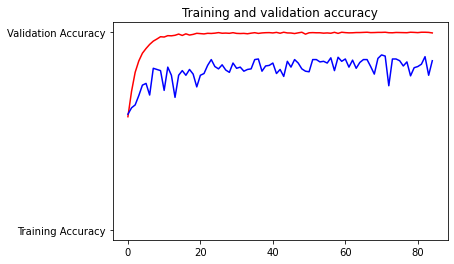

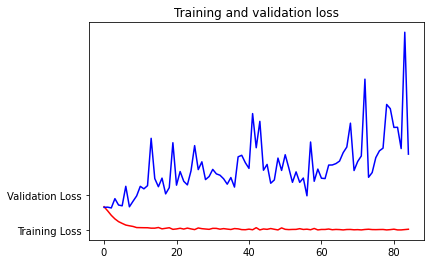

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")

plt.title('Training and validation loss')


**************************************
**Visualizing each Convolution and MaxPooling layer.**
************************************** 

D:\Users\AR100003\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


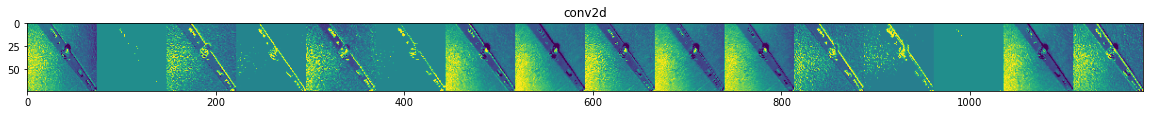

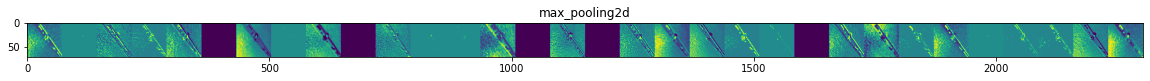

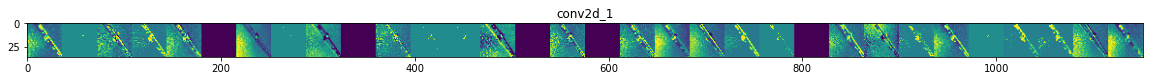

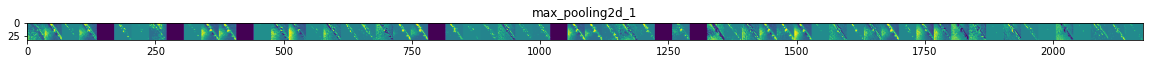

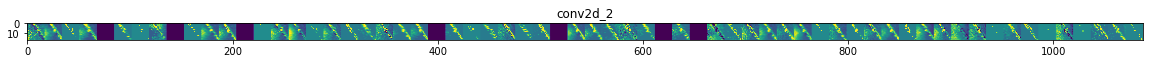

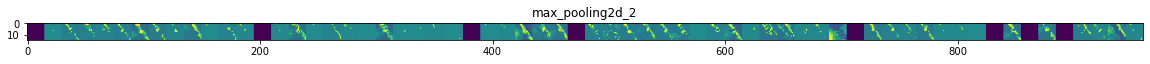

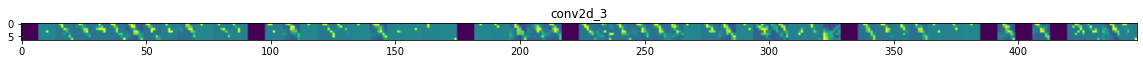

In [ ]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


reflective_img_files = [os.path.join(train_reflective_dir, f) for f in train_reflective_files]
refractive_img_files = [os.path.join(train_refractive_dir, f) for f in train_refractive_files]

img_path = random.choice(reflective_img_files + refractive_img_files)
img = load_img(img_path, target_size=(150,150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0


successive_feature_maps = visualization_model.predict(x)


layer_names = [layer.name for layer in model.layers]

#Display our representations

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    
    # Conv / maxpool layers, not the fully-connected layers
    
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    

    display_grid = np.zeros((size, size * n_features))
    
    
    # Postprocess the feature to be visually palatable
    
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid


    # Display the grid


    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )